Exploratory Data Analysis for `Daily Brent Oil Prices:` Data begins in May 20, 1987 and ends in September 30, 2019

### Brent Crude is a major trading classification of sweet light crude oil that serves as one of the two main benchmark prices for purchases of oil worldwide, the other being West Texas Intermediate.

In [1]:
# Import libraries for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Naive Approach

In [5]:
# Step 1- import Brent Crude Data
price= pd.read_csv('Data')
price.head()
price.tail()

,Date,Price
8211,"Sep 24, 2019",64.13
8212,"Sep 25, 2019",62.41
8213,"Sep 26, 2019",62.08
8214,"Sep 27, 2019",62.48
8215,"Sep 30, 2019",60.99


In [8]:
# Step 2- Split into training and testing set
train = price[0:7800]
test = price[7800:]

In [19]:
# Step 3- Naive Forecast
dd = np.asarray(train.Price)
y_hat=test.copy()
y_hat['naive']=dd[len(dd)-1]

In [54]:
y_hat['naive'].count()

416

In [64]:
train.count()

Date     7800
Price    7800
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

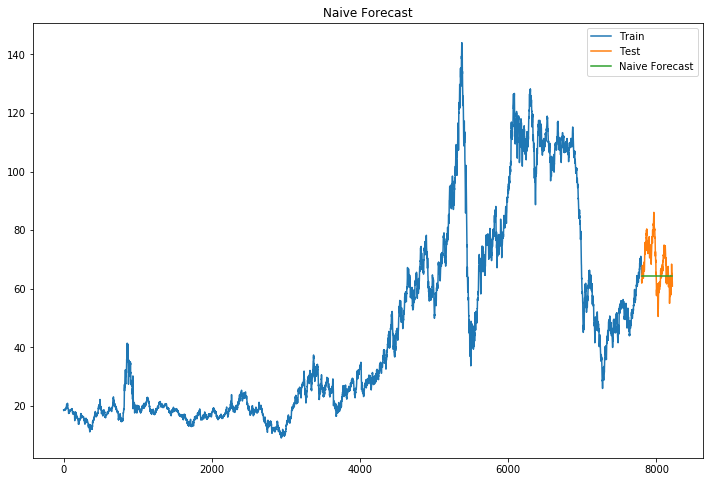

In [20]:
# Step 4- Plot
plt.figure(figsize=(12,8));
plt.plot(train.index, train['Price'], label='Train')
plt.plot(test.index, test['Price'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show

In [21]:
# Step 5 - Result
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
rmse = sqrt(mean_squared_error(test.Price, y_hat.naive))
print('RMSE_test: %f ' %(rmse))

RMSE_test: 8.212586 


### Simple Average

Using the average of all past days in the training set.

In [39]:
#Define Avg.
y_hat_avg =test.copy()
y_hat_avg['avg_forecast']= train.Price.mean()

<function matplotlib.pyplot.show(*args, **kw)>

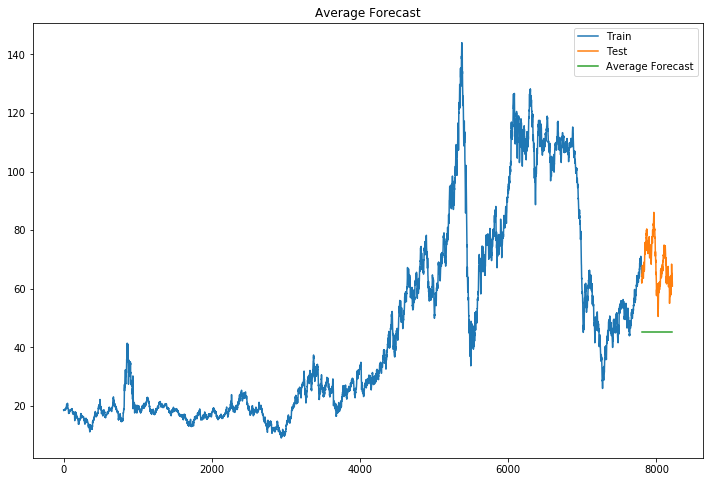

In [25]:
#Plot
plt.figure(figsize=(12,8));
plt.plot(train['Price'], label='Train')
plt.plot( test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'],  label='Average Forecast')
plt.legend(loc='best')
plt.title('Average Forecast')
plt.show

In [26]:
#Result
rmse = sqrt(mean_squared_error(test.Price, y_hat_avg.avg_forecast))
print('RMSE_test: %f ' %(rmse))

RMSE_test: 24.331902 


###  Weighted Moving Average

Improve simple average by only taking the average for the prices for the last time period. The more recent our data the more it matters, hence the more weight we add to these data points.

### Simple Exponential Smoothing

Instead of manually deciding what the weights are we can smooth the data.

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [29]:
# Compute Simple Exponential Smoothing
y_hat_avgg = test.copy()
fit2=SimpleExpSmoothing(np.asarray(train['Price'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avgg['SES']=fit2.forecast(len(test))

<function matplotlib.pyplot.show(*args, **kw)>

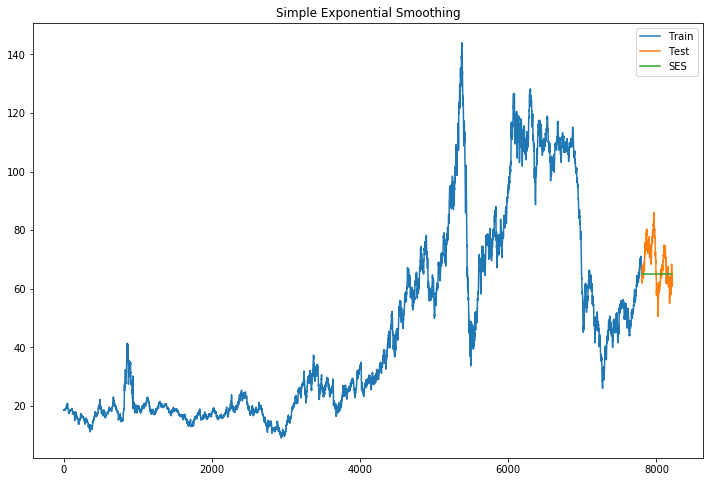

In [30]:
#Plot
plt.figure(figsize=(12,8));
plt.plot(train['Price'], label='Train')
plt.plot( test['Price'], label='Test')
plt.plot(y_hat_avgg['SES'],  label='SES')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show

In [31]:
#Result
rmse = sqrt(mean_squared_error(test.Price, y_hat_avgg.SES))
print('RMSE_test: %f ' %(rmse))

RMSE_test: 7.828926 


### EDA

In [13]:
price.shape

(8216, 2)

In [14]:
price.isnull().sum()

Date     0
Price    0
dtype: int64

Data is clean only need to change the Date object for plotting purposes.

In [15]:
price.dtypes

Date      object
Price    float64
dtype: object

In [16]:
price.describe()

,Price
count,8216.000000
mean,46.332605
std,32.704113
min,9.100000
25%,18.730000
50%,31.260000
75%,67.432500
max,143.950000


In [17]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
Date     8216 non-null object
Price    8216 non-null float64
dtypes: float64(1), object(1)
memory usage: 128.5+ KB


In [18]:
price.index

RangeIndex(start=0, stop=8216, step=1)

In [19]:
print(price['Date'].min())
print('-----------------------')
print(price['Date'].max())

Apr 01, 1991
-----------------------
Sep 30, 2019


Python timedelta() function is present under datetime library which is generally used for calculating differences in dates and also can be used for date manipulations in Python. It is one of the easiest ways to perform date manipulations.

In [6]:
from datetime import datetime
from datetime import timedelta
import datetime

In [7]:
price['Date'] = pd.to_datetime(price['Date'])
price.head(5)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [22]:
# Changed date from object to datetime.
price.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.

In [23]:
x=price['Date']
y=price['Price']
variables = np.polyfit(np.asarray(x).astype(float), y, 1)
#Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.

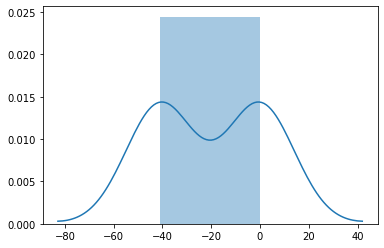

In [24]:
import seaborn as sns
sns.distplot(variables);

C:\Users\dnava\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


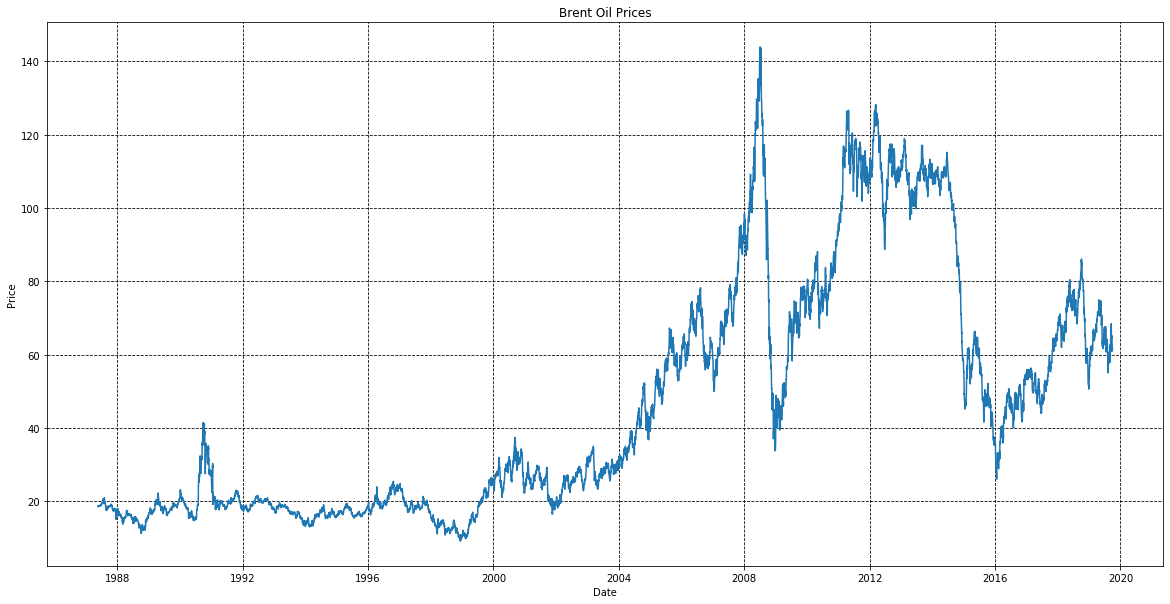

In [16]:
# Plotting all the data.
plt.figure(figsize=(20,10))
sns.lineplot(x='Date', y='Price',data=price)
plt.title('Brent Oil Prices')
plt.grid(color='k', ls='--')

In [25]:
# Set Date to be the index.
price.set_index('Date', inplace=True)
price.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


### Create a `Timestamp` object for the date.

In [26]:
ts = pd.to_datetime('1/1/2016')

### Use the timestamp object to perform logical filtering on the DataFrame and create a subset of entries with a date above or equal to 1/1/2016

In [27]:
recent_price = price.loc[price.index >= ts, :]
print(recent_price.head(), recent_price.tail())

            Price
Date             
2016-01-04  36.28
2016-01-05  35.56
2016-01-06  33.89
2016-01-07  33.57
2016-01-08  31.67             Price
Date             
2019-09-24  64.13
2019-09-25  62.41
2019-09-26  62.08
2019-09-27  62.48
2019-09-30  60.99


In [21]:
recent_price.shape

(955, 1)

Plot daily recent_price data.

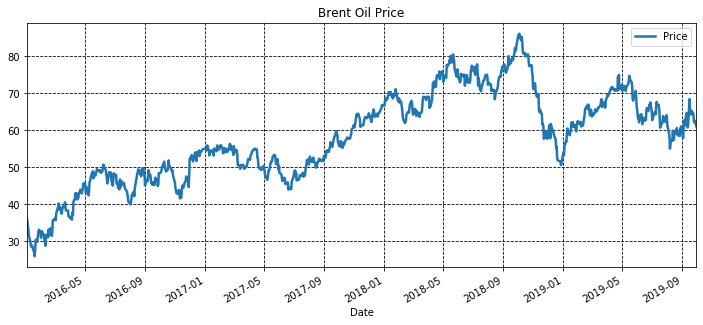

In [22]:
recent_price.plot(lw=2.5, figsize=(12,5));
plt.title('Brent Oil Price');
plt.grid(color='k', ls='--')

### ROLLING STATISTICS

### Calculate the `rolling mean` of yearly with window=3, without centering, and plot 

Changed data to quarterly to better observe seasonality in it.

In [23]:
quarterly = recent_price['Price'].resample('Q').mean().rolling(window=3, center=False).mean()
quarterly.head(16)

Date
2016-03-31          NaN
2016-06-30          NaN
2016-09-30    41.736893
2016-12-31    46.806719
2017-03-31    49.482605
2017-06-30    50.733605
2017-09-30    51.749326
2017-12-31    54.349985
2018-03-31    60.119795
2018-06-30    67.597957
2018-09-30    72.155839
2018-12-31    72.789299
2019-03-31    68.977109
2019-06-30    66.965893
2019-09-30    64.693189
Freq: Q-DEC, Name: Price, dtype: float64

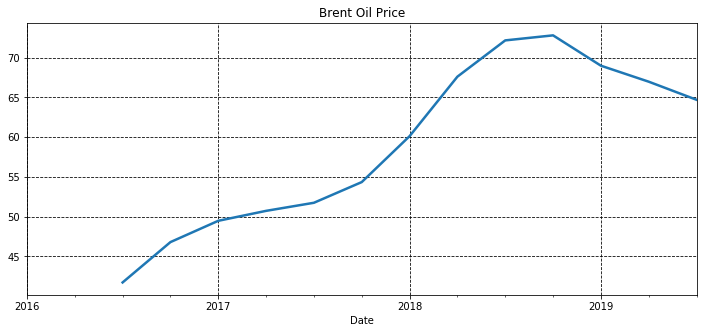

In [24]:
quarterly.plot(lw=2.5, figsize=(12,5));

plt.title('Brent Oil Price');
plt.grid(color='k', ls='--')

In [25]:
# Extract the dates from the index as timestamps.
date_ticks_orig = recent_price.index.to_pydatetime()
date_ticks_roll = quarterly.index.to_pydatetime()

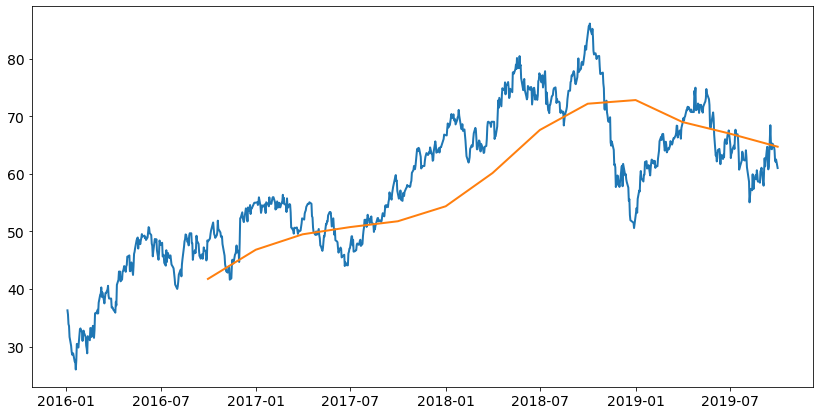

In [26]:
plt.figure(figsize=(14,7))

plt.plot(date_ticks_orig, recent_price.Price.values,lw=2)
plt.plot(date_ticks_roll, quarterly.values, lw=2)

plt.tick_params(labelsize=14)


 ### Calculate the rolling median with window=5 and window=15. Plot both together with the original data

In [27]:
uroll_w5 = recent_price.Price.rolling(window=5).median()
uroll_w15 = recent_price.Price.rolling(window=15).median()

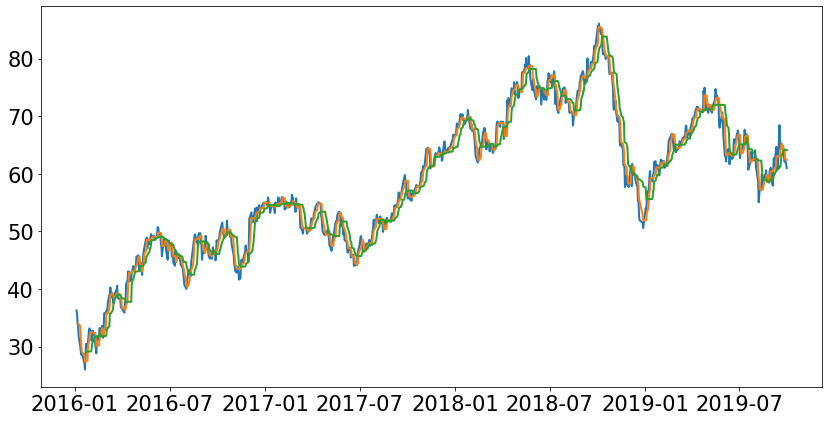

In [28]:
plt.figure(figsize=(14,7))

plt.plot(date_ticks_orig, recent_price.Price.values,lw=2)
plt.plot(date_ticks_orig, uroll_w5, lw=2)
plt.plot(date_ticks_orig, uroll_w15, lw=2)

plt.tick_params(labelsize=21)


### Calculate and plot the exponentially weighted sum along with the rolling sum.

In [29]:
rolling_mean = recent_price.Price.resample('Q').sum().rolling(window=2, center=True).mean()
exp_weighted_mean = recent_price.Price.resample('Q').sum().ewm(span=10).mean()

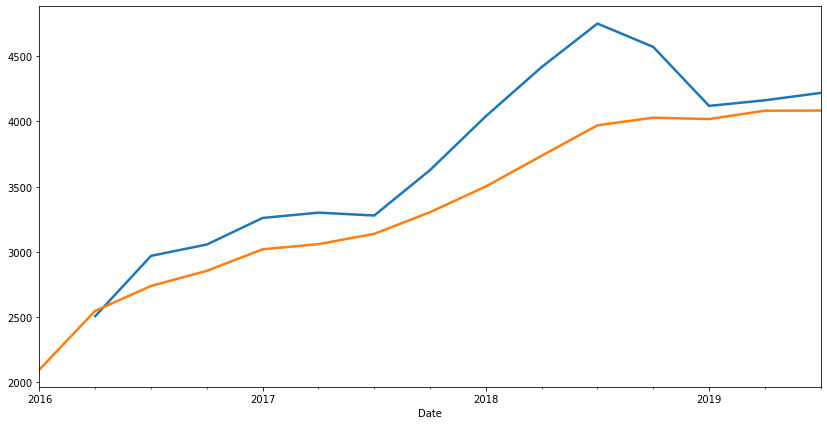

In [30]:
ax = rolling_mean.plot(lw=2.5, figsize=(14,7))
exp_weighted_mean.plot(ax=ax, lw=2.5);

### AUTOCORRELATION

### Use plot_acf and plot_pacf to look at the autocorrelation in the data set.

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [32]:
brent= recent_price.stack()

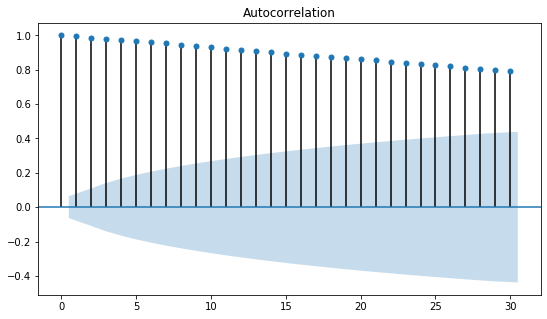

In [33]:
fig, ax = plt.subplots(figsize=(9,5))
plot_acf(brent, lags=30, ax=ax)
plt.show()

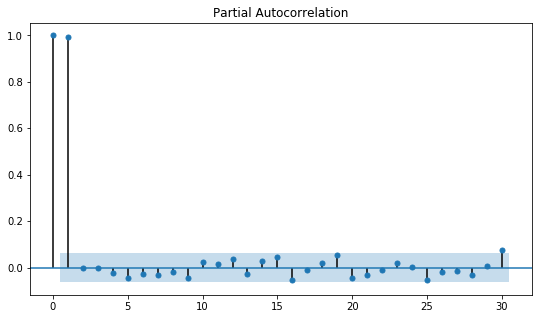

In [34]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(brent, lags=30, ax=ax)
plt.show()

### DECOMPOSITION

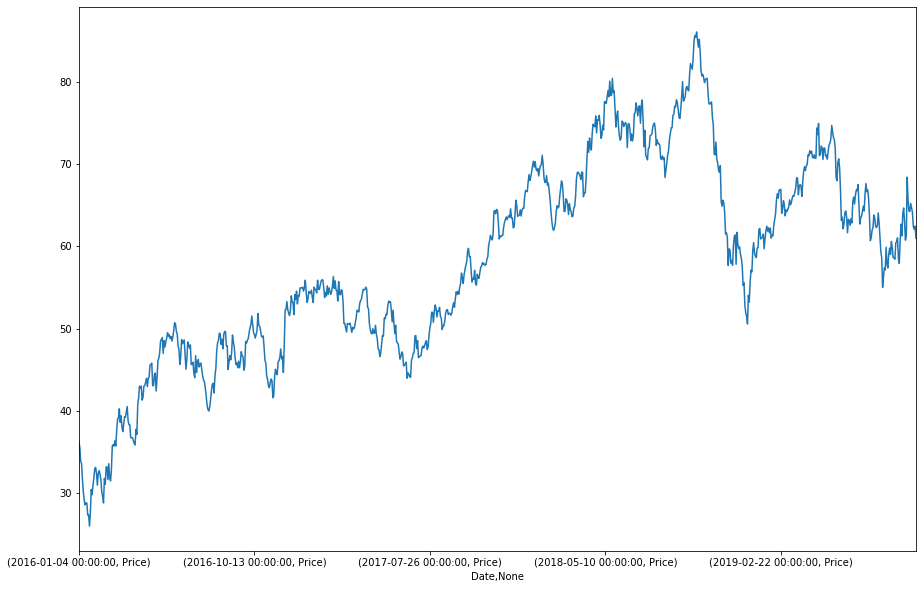

In [36]:
brent.plot(figsize=(15,10))


### Decompose the time series and plot using the .seasonal_decompose() function.

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [49]:
decomposition = seasonal_decompose(recent_price, freq = 16)

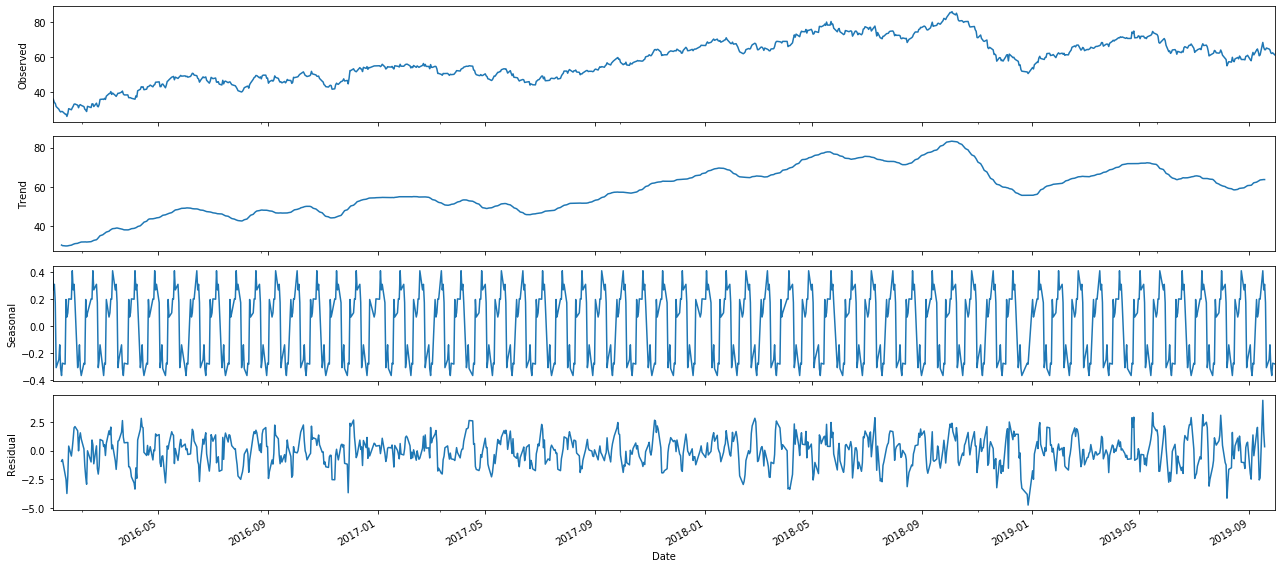

In [50]:
decomposition.plot()
plt.show()

We can see a lot of seasonality as the quarters pass by and it seems to be constant every year. We see an increasing trend of Brent oil price.

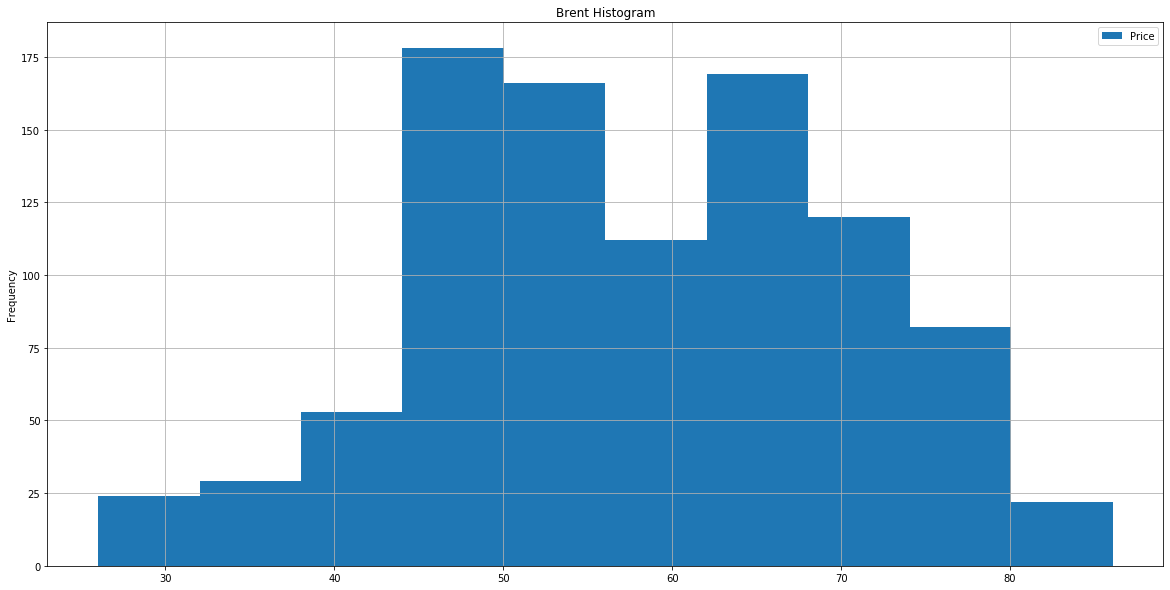

In [40]:
recent_price.plot(kind='hist', title= 'Brent Histogram', figsize=(20,10), grid=True)

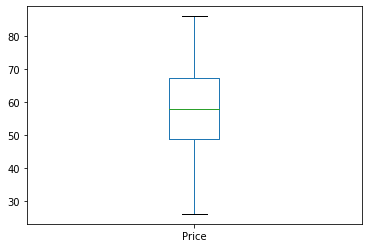

In [41]:
recent_price['Price'].plot(kind='box')

In [42]:
recent_price.groupby('Price').count()

""
Price
26.01
27.36
27.59
28.58
28.80
28.82
28.84
29.14
29.64


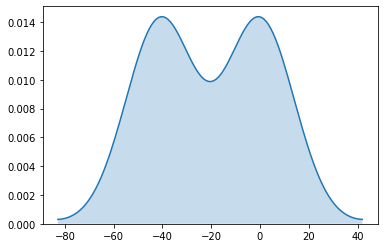

In [43]:
sns.kdeplot(variables, shade=True)

In [44]:
date_sort=recent_price.sort_values('Date')
date_sort.head()

,Price
Date,
2016-01-04,36.28
2016-01-05,35.56
2016-01-06,33.89
2016-01-07,33.57
2016-01-08,31.67


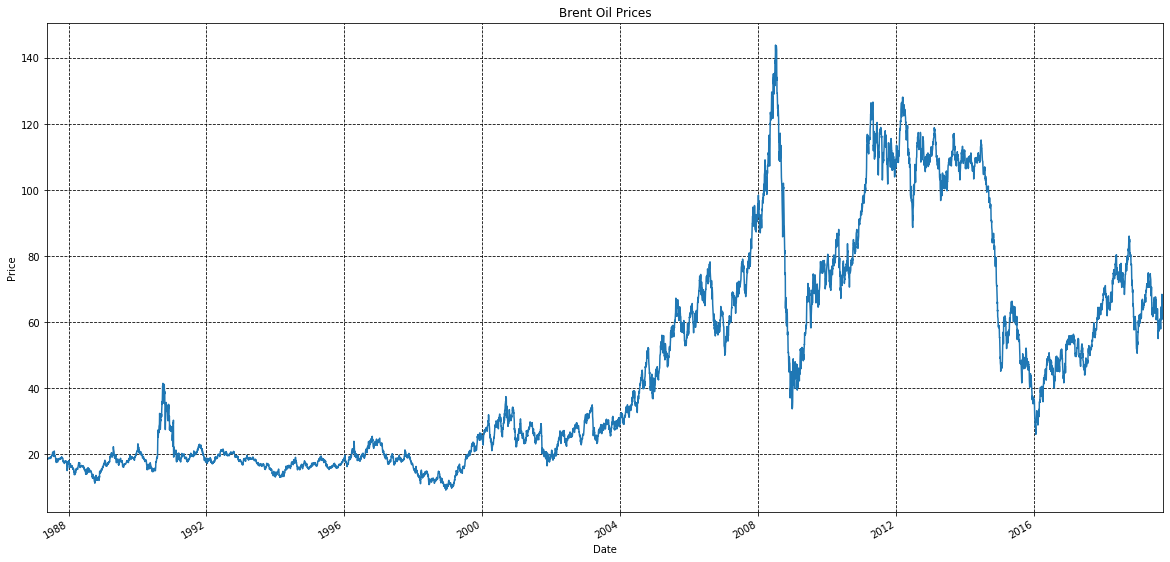

In [45]:
#price visualization by year
plt.figure(figsize=(20,10))

price_year=price.groupby(['Date'])['Price'].mean()

plt.title('Brent Oil Prices')
plt.xlabel('Year')
plt.ylabel('Price')
price_year.plot()
plt.grid(color='k', ls='--')

Need to elaborate on this plot to show the years I want... maybe separate data by seasons as well to determine in what seasons the prices higher.

In [46]:
print(recent_price.var())
print('-----------------------')
print(recent_price.corr()) 

Price    151.37616
dtype: float64
-----------------------
       Price
Price    1.0


### Forecast

Make sure not to train and test on the whole dataset

In [36]:
X = recent_price.index
y = recent_price['Price']
y.values.reshape(-1,1)

array([[36.28],
       [35.56],
       [33.89],
       [33.57],
       [31.67],
       [30.14],
       [29.14],
       [28.58],
       [28.84],
       [28.8 ],
       [27.36],
       [27.36],
       [26.01],
       [27.59],
       [30.46],
       [29.82],
       [30.94],
       [31.83],
       [33.01],
       [33.14],
       [32.45],
       [30.98],
       [32.38],
       [32.76],
       [32.35],
       [31.64],
       [30.15],
       [29.64],
       [28.82],
       [31.8 ],
       [31.09],
       [33.21],
       [33.2 ],
       [31.66],
       [33.59],
       [31.9 ],
       [31.5 ],
       [32.83],
       [35.76],
       [35.92],
       [35.73],
       [36.38],
       [35.75],
       [37.61],
       [39.02],
       [39.16],
       [40.26],
       [38.63],
       [39.41],
       [38.06],
       [37.49],
       [38.38],
       [39.29],
       [39.26],
       [39.91],
       [40.54],
       [38.84],
       [38.33],
       [38.33],
       [36.75],
       [36.75],
       [36.75],
       [